In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
i_max = 100  # maximum number of transaction slots
lambda_on = 0.1  # on-chain transaction arrival rate
lambda_off = 0.05  # off-chain transaction arrival rate
mu = 0.2  # block posting rate
time_steps = 10000  # number of time steps for simulation

# Variables for storing metrics
W = np.zeros(time_steps)  # average waiting time
L = np.zeros(time_steps)  # average block space
gamma = np.zeros(time_steps)  # throughput


In [ ]:
queue = []

for t in range(time_steps):
    # Incoming transactions
    if np.random.rand() < lambda_on:
        queue.append('on-chain')
    if np.random.rand() < lambda_off:
        queue.append('off-chain')

    # Process transactions
    if len(queue) > 0 and np.random.rand() < mu:
        queue.pop(0)  # remove one transaction per time unit

    # Update metrics
    W[t] = len(queue) / (lambda_on + lambda_off) if len(queue) > 0 else 0
    L[t] = len(queue)
    gamma[t] = 1 / W[t] if W[t] != 0 else 0


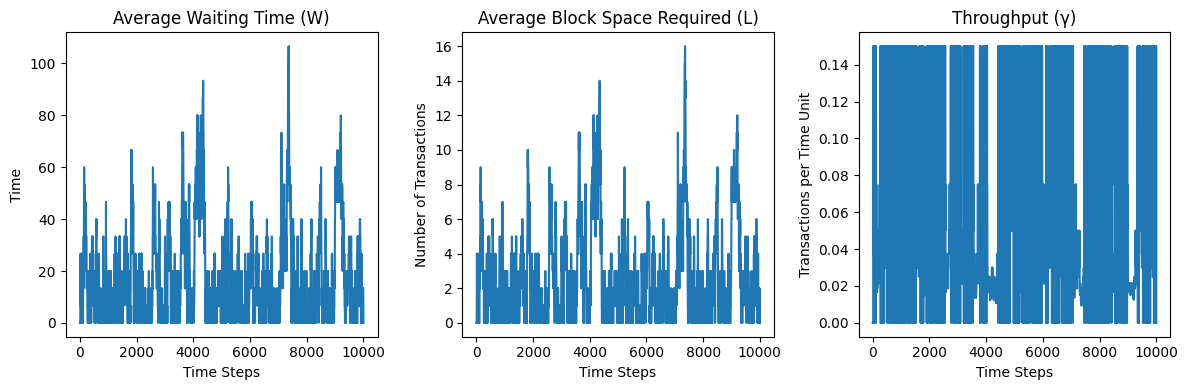

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(W)
plt.title('Average Waiting Time (W)')
plt.xlabel('Time Steps')
plt.ylabel('Time')

plt.subplot(1, 3, 2)
plt.plot(L)
plt.title('Average Block Space Required (L)')
plt.xlabel('Time Steps')
plt.ylabel('Number of Transactions')

plt.subplot(1, 3, 3)
plt.plot(gamma)
plt.title('Throughput (γ)')
plt.xlabel('Time Steps')
plt.ylabel('Transactions per Time Unit')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
slots = np.arange(1, 101)  # From 1 to 100 transaction slots
lambda_on = 0.05  # On-chain transaction arrival rate per slot
lambda_off = 0.03  # Off-chain transaction arrival rate per slot
mu = 0.1  # Block posting rate

# Time settings for simulation
time_steps = 100000  # Number of time steps for the simulation


In [ ]:
# Initialize state metrics
W = np.zeros((len(slots), time_steps))
L = np.zeros((len(slots), time_steps))
gamma = np.zeros((len(slots), time_steps))

for index, i in enumerate(slots):
    queue = []
    for t in range(time_steps):
        # Transaction arrivals
        arrivals_on = np.random.poisson(lambda_on * i)
        arrivals_off = np.random.poisson(lambda_off * i)
        queue.extend(['on'] * arrivals_on)
        queue.extend(['off'] * arrivals_off)

        # Block processing
        if len(queue) > 0 and np.random.rand() < mu:
            queue.pop(0)  # Process one transaction per time unit

        # Metrics calculation
        W[index, t] = len(queue) / (lambda_on + lambda_off) if len(queue) > 0 else 0
        L[index, t] = len(queue)
        gamma[index, t] = 1 / W[index, t] if W[index, t] != 0 else 0


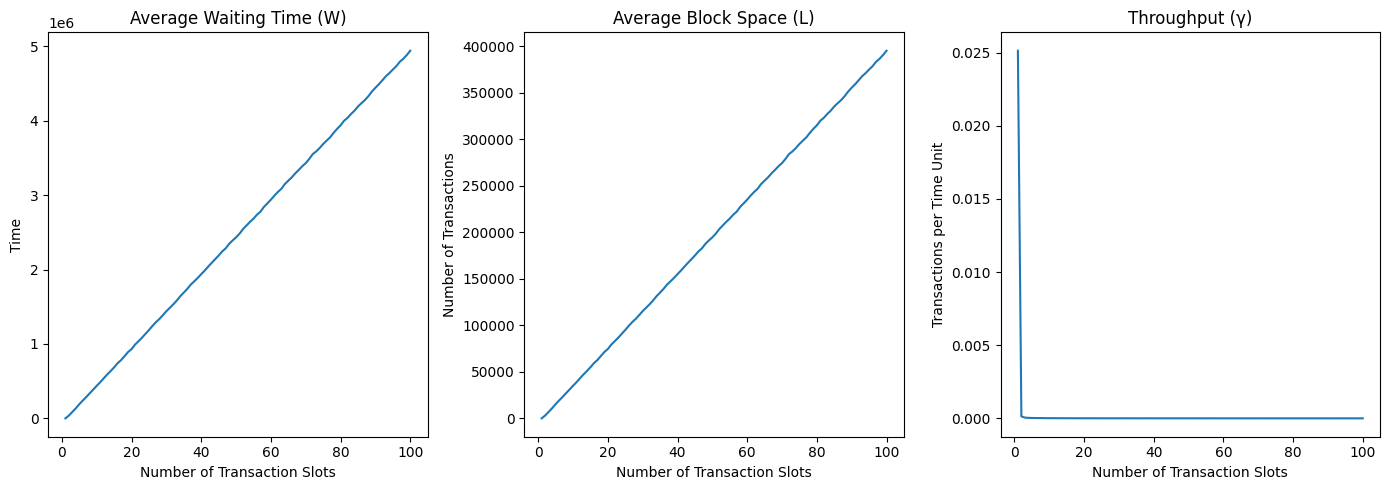

In [ ]:
# Averages over time
W_avg = np.mean(W, axis=1)
L_avg = np.mean(L, axis=1)
gamma_avg = np.mean(gamma, axis=1)

# Plotting results
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(slots, W_avg)
plt.title('Average Waiting Time (W)')
plt.xlabel('Number of Transaction Slots')
plt.ylabel('Time')

plt.subplot(1, 3, 2)
plt.plot(slots, L_avg)
plt.title('Average Block Space (L)')
plt.xlabel('Number of Transaction Slots')
plt.ylabel('Number of Transactions')

plt.subplot(1, 3, 3)
plt.plot(slots, gamma_avg)
plt.title('Throughput (γ)')
plt.xlabel('Number of Transaction Slots')
plt.ylabel('Transactions per Time Unit')

plt.tight_layout()
plt.show()


In [ ]:
# Financial parameters
transaction_fee = 0.01  # Fee per transaction
block_reward = 2  # Reward for processing a block


In [ ]:
# Extend the metrics to include financial aspects
total_fees = np.zeros(len(slots))
total_rewards = np.zeros(len(slots))

for index, i in enumerate(slots):
    queue = []
    fees_collected = 0
    rewards_collected = 0

    for t in range(time_steps):
        # Transaction arrivals with fees
        arrivals_on = np.random.poisson(lambda_on * i)
        arrivals_off = np.random.poisson(lambda_off * i)
        queue.extend(['on'] * arrivals_on)
        queue.extend(['off'] * arrivals_off)

        # Collect fees
        fees_collected += (arrivals_on + arrivals_off) * transaction_fee

        # Block processing with rewards
        if len(queue) > 0 and np.random.rand() < mu:
            queue.pop(0)  # Process one transaction per time unit
            rewards_collected += block_reward

        # Metrics calculation
        W[index, t] = len(queue) / (lambda_on + lambda_off) if len(queue) > 0 else 0
        L[index, t] = len(queue)
        gamma[index, t] = 1 / W[index, t] if W[index, t] != 0 else 0

    # Store total fees and rewards for this slot configuration
    total_fees[index] = fees_collected
    total_rewards[index] = rewards_collected


In [ ]:
# Averages over time for performance metrics
W_avg = np.mean(W, axis=1)
L_avg = np.mean(L, axis=1)
gamma_avg = np.mean(gamma, axis=1)

# Printing all steps and values for selected slot counts
selected_slots = [10, 50, 100]  # Example slots to print details for
for slot in selected_slots:
    idx = np.where(slots == slot)[0][0]
    print(f"Results for {slot} slots:")
    print(f"Average Waiting Time (W): {W_avg[idx]:.2f}")
    print(f"Average Block Space (L): {L_avg[idx]:.2f}")
    print(f"Throughput (γ): {gamma_avg[idx]:.2f}")
    print(f"Total Fees Collected: {total_fees[idx]:.2f}")
    print(f"Total Rewards Collected: {total_rewards[idx]:.2f}")
    print("\n")


Results for 10 slots:
Average Waiting Time (W): 438634.45
Average Block Space (L): 35090.76
Throughput (γ): 0.00
Total Fees Collected: 806.33
Total Rewards Collected: 20282.00


Results for 50 slots:
Average Waiting Time (W): 2442264.74
Average Block Space (L): 195381.18
Throughput (γ): 0.00
Total Fees Collected: 4004.90
Total Rewards Collected: 20078.00


Results for 100 slots:
Average Waiting Time (W): 4948660.63
Average Block Space (L): 395892.85
Throughput (γ): 0.00
Total Fees Collected: 8008.49
Total Rewards Collected: 19882.00




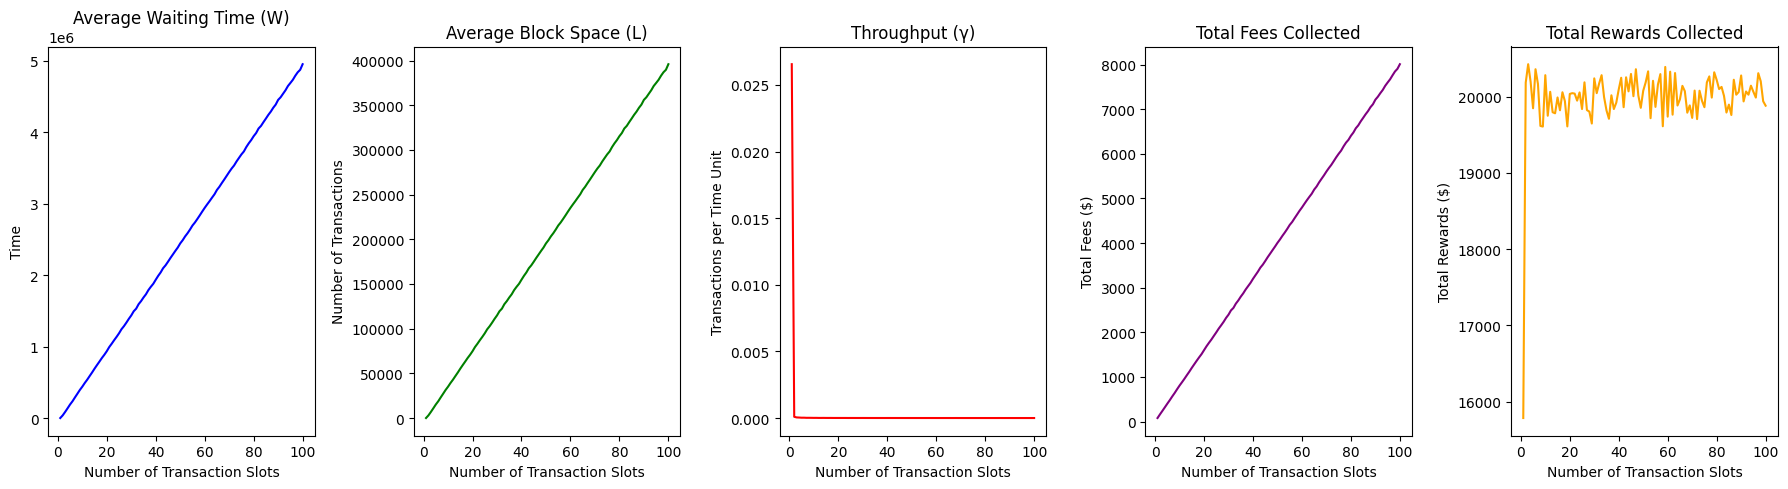

In [ ]:
import matplotlib.pyplot as plt

# Plotting results including financial metrics
plt.figure(figsize=(18, 5))

# Plot for Average Waiting Time (W)
plt.subplot(1, 5, 1)
plt.plot(slots, W_avg, color='blue')
plt.title('Average Waiting Time (W)')
plt.xlabel('Number of Transaction Slots')
plt.ylabel('Time')

# Plot for Average Block Space (L)
plt.subplot(1, 5, 2)
plt.plot(slots, L_avg, color='green')
plt.title('Average Block Space (L)')
plt.xlabel('Number of Transaction Slots')
plt.ylabel('Number of Transactions')

# Plot for Throughput (γ)
plt.subplot(1, 5, 3)
plt.plot(slots, gamma_avg, color='red')
plt.title('Throughput (γ)')
plt.xlabel('Number of Transaction Slots')
plt.ylabel('Transactions per Time Unit')

# Plot for Total Fees Collected
plt.subplot(1, 5, 4)
plt.plot(slots, total_fees, color='purple')
plt.title('Total Fees Collected')
plt.xlabel('Number of Transaction Slots')
plt.ylabel('Total Fees ($)')

# Plot for Total Rewards Collected
plt.subplot(1, 5, 5)
plt.plot(slots, total_rewards, color='orange')
plt.title('Total Rewards Collected')
plt.xlabel('Number of Transaction Slots')
plt.ylabel('Total Rewards ($)')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
slots = np.arange(1, 101)  # Transaction slots
lambda_on = 0.05  # On-chain transaction arrival rate per slot
lambda_off = 0.03  # Off-chain transaction arrival rate per slot
mu = 0.1  # Block posting rate
time_steps = 100000  # Number of time steps for the simulation

# Financial parameters
transaction_fee = 0.01  # Fee per transaction
block_reward = 2  # Reward for processing a block


In [ ]:
def run_simulation(with_financials=False):
    W_avg = np.zeros(len(slots))
    L_avg = np.zeros(len(slots))
    gamma_avg = np.zeros(len(slots))
    total_fees = np.zeros(len(slots))
    total_rewards = np.zeros(len(slots))

    for index, i in enumerate(slots):
        queue = []
        fees_collected = 0
        rewards_collected = 0

        for t in range(time_steps):
            arrivals_on = np.random.poisson(lambda_on * i)
            arrivals_off = np.random.poisson(lambda_off * i)
            queue.extend(['on'] * arrivals_on + ['off'] * arrivals_off)

            if len(queue) > 0 and np.random.rand() < mu:
                queue.pop(0)  # Process one transaction
                if with_financials:
                    rewards_collected += block_reward
                    fees_collected += (arrivals_on + arrivals_off) * transaction_fee

            W_avg[index] += len(queue) / (lambda_on + lambda_off) if len(queue) > 0 else 0
            L_avg[index] += len(queue)
            gamma_avg[index] += 1 / (len(queue) / (lambda_on + lambda_off)) if len(queue) > 0 else 0

        W_avg[index] /= time_steps
        L_avg[index] /= time_steps
        gamma_avg[index] /= time_steps
        total_fees[index] = fees_collected
        total_rewards[index] = rewards_collected

    return W_avg, L_avg, gamma_avg, total_fees, total_rewards


In [ ]:
W_no_fin, L_no_fin, gamma_no_fin, _, _ = run_simulation(with_financials=False)
W_fin, L_fin, gamma_fin, fees, rewards = run_simulation(with_financials=True)


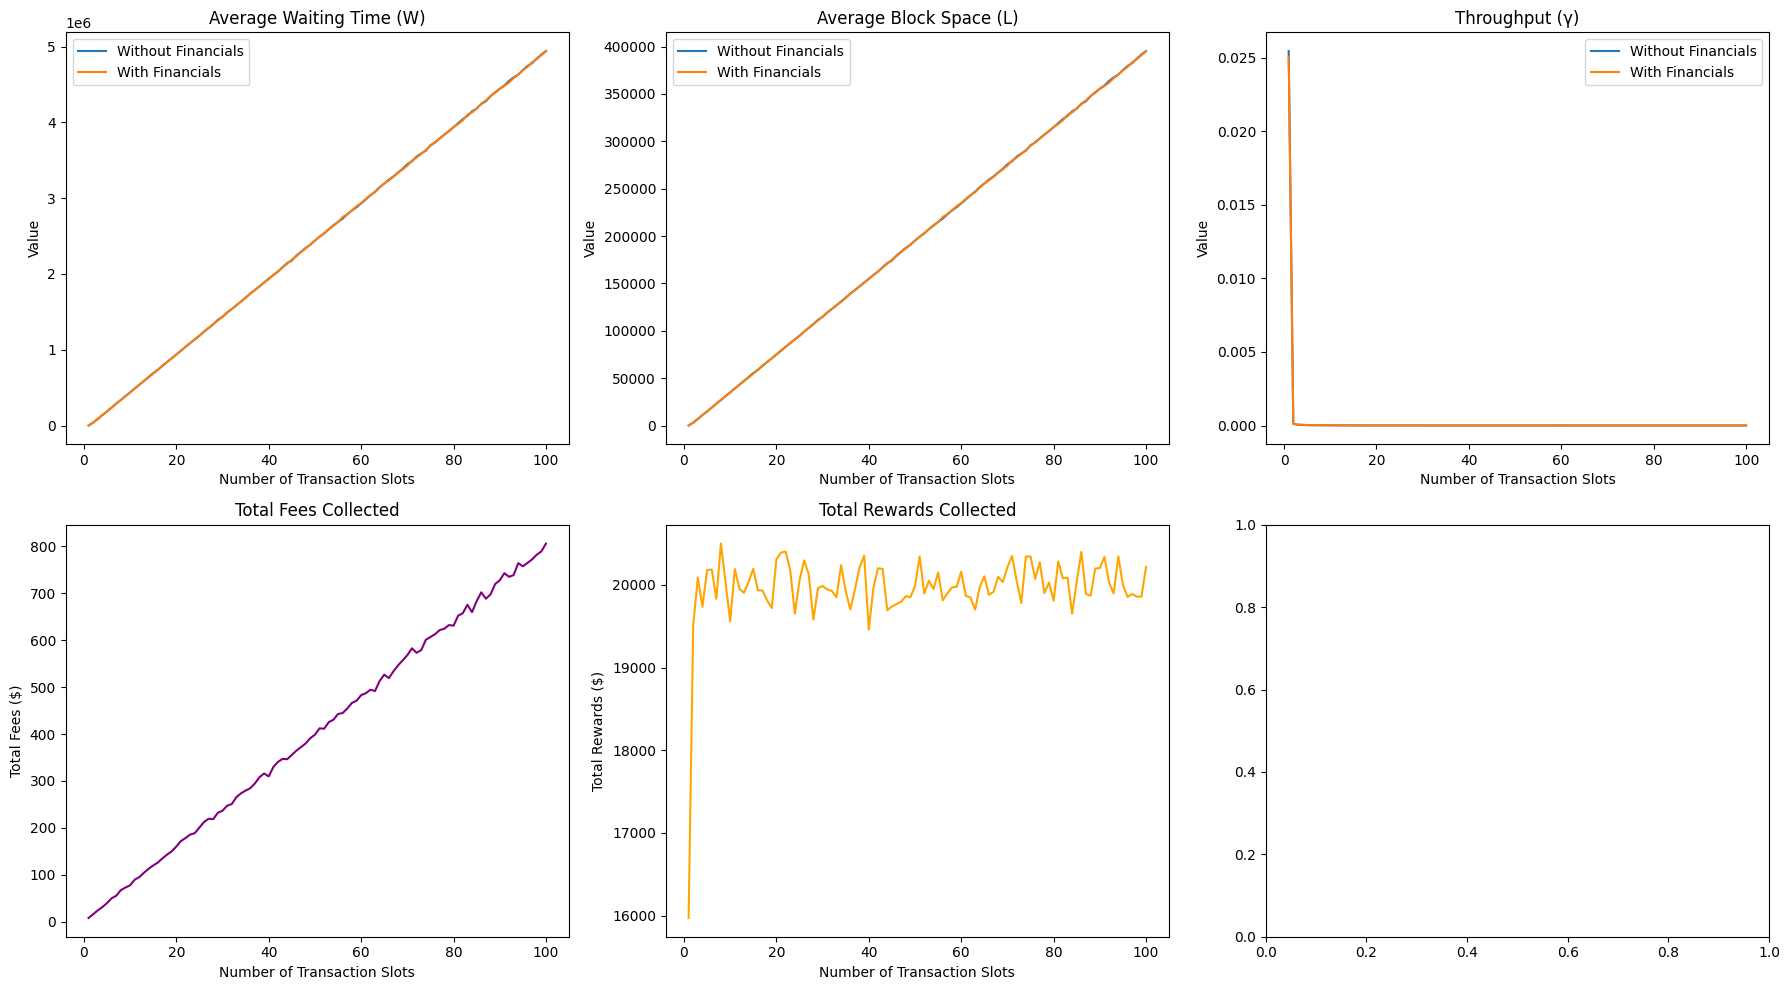

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
titles = ['Average Waiting Time (W)', 'Average Block Space (L)', 'Throughput (γ)']
data_no_fin = [W_no_fin, L_no_fin, gamma_no_fin]
data_fin = [W_fin, L_fin, gamma_fin]

for i, ax in enumerate(axes.flat[:-3]):
    ax.plot(slots, data_no_fin[i], label='Without Financials')
    ax.plot(slots, data_fin[i], label='With Financials')
    ax.set_title(titles[i])
    ax.set_xlabel('Number of Transaction Slots')
    ax.set_ylabel('Value')
    ax.legend()

# Financial metrics plotting
axes[1, 0].plot(slots, fees, color='purple', label='Total Fees Collected')
axes[1, 0].set_title('Total Fees Collected')
axes[1, 0].set_xlabel('Number of Transaction Slots')
axes[1, 0].set_ylabel('Total Fees ($)')

axes[1, 1].plot(slots, rewards, color='orange', label='Total Rewards Collected')
axes[1, 1].set_title('Total Rewards Collected')
axes[1, 1].set_xlabel('Number of Transaction Slots')
axes[1, 1].set_ylabel('Total Rewards ($)')

fig.tight_layout()
plt.show()


In [ ]:
selected_slots = [10, 50, 100]
for slot in selected_slots:
    idx = np.where(slots == slot)[0][0]
    print(f"Results for {slot} slots:")
    print(f"Without Financials - W: {W_no_fin[idx]}, L: {L_no_fin[idx]}, γ: {gamma_no_fin[idx]}")
    print(f"With Financials - W: {W_fin[idx]}, L: {L_fin[idx]}, γ: {gamma_fin[idx]}, Fees: {fees[idx]}, Rewards: {rewards[idx]}\n")


Results for 10 slots:
Without Financials - W: 438307.8165, L: 35064.62532, γ: 1.3960394290708924e-05
With Financials - W: 434646.84725, L: 34771.74778, γ: 1.3174209929877121e-05, Fees: 77.70000000000263, Rewards: 19560.0

Results for 50 slots:
Without Financials - W: 2440177.824875, L: 195214.22599, γ: 2.295504921852624e-06
With Financials - W: 2441404.293375, L: 195312.34347, γ: 2.6487101833411945e-06, Fees: 398.799999999993, Rewards: 19988.0

Results for 100 slots:
Without Financials - W: 4940871.5345, L: 395269.72276, γ: 1.209799293737709e-06
With Financials - W: 4937196.30375, L: 394975.7043, γ: 1.1534211807992709e-06, Fees: 806.0000000000152, Rewards: 20216.0



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_L_vs_n(lambdas, mu, n_range, with_financials=False):
    results = {}
    for lambda_val in lambdas:
        L_avg = []
        for n in n_range:
            queue = []
            total_L = 0
            time_steps = 10000  # Reduce for quicker simulations if needed

            for t in range(time_steps):
                # Transaction arrivals considering n slots
                arrivals = np.random.poisson(lambda_val * n)
                queue.extend([1] * arrivals)  # Extend queue by number of arrivals

                # Process transactions based on mu
                if len(queue) > 0 and np.random.rand() < mu:
                    queue.pop(0)  # Process one transaction

                # Financial mechanisms
                if with_financials:
                    # Placeholder for financial transactions processing
                    # Not affecting queue length directly in this simplified model
                    pass

                total_L += len(queue)

            # Calculate average L for this n
            L_avg.append(total_L / time_steps)

        results[lambda_val] = L_avg
    return results

# Parameters
n_range = np.arange(1, 101)
lambdas = [0.005, 0.01, 0.03, 0.05]
mu = 0.0667  # Fixed block posting rate


In [ ]:
results_without_financials = simulate_L_vs_n(lambdas, mu, n_range, with_financials=False)
results_with_financials = simulate_L_vs_n(lambdas, mu, n_range, with_financials=True)


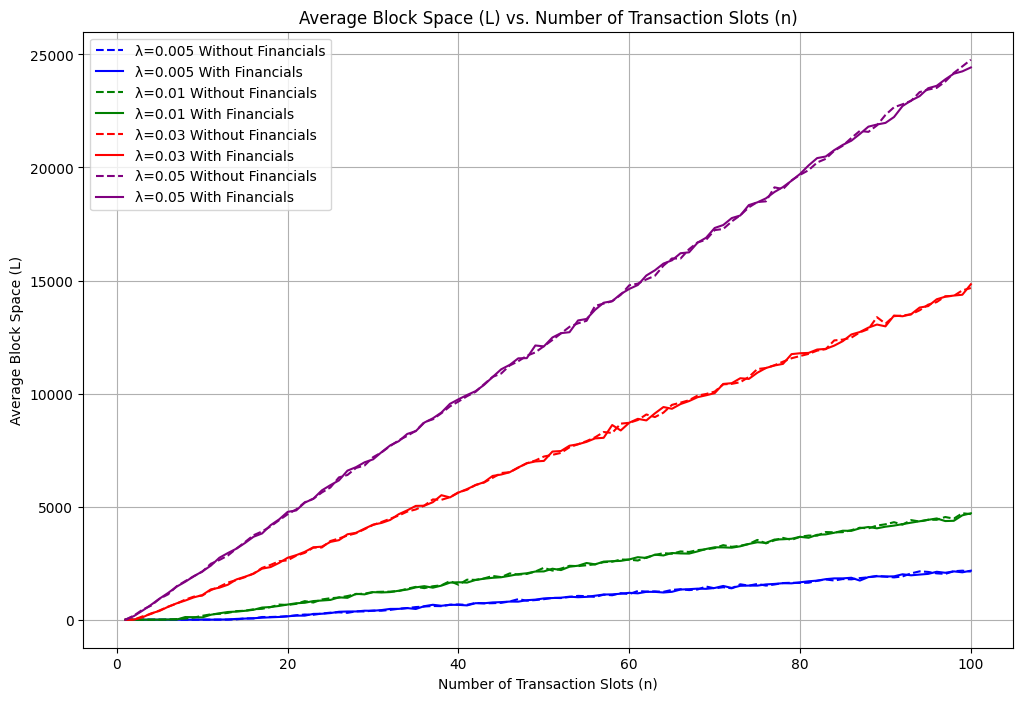

In [ ]:
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']  # Different color for each lambda

for i, lambda_val in enumerate(lambdas):
    plt.plot(n_range, results_without_financials[lambda_val], label=f'λ={lambda_val} Without Financials', color=colors[i], linestyle='--')
    plt.plot(n_range, results_with_financials[lambda_val], label=f'λ={lambda_val} With Financials', color=colors[i], linestyle='-')

plt.title('Average Block Space (L) vs. Number of Transaction Slots (n)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Block Space (L)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def simulate_L_vs_n(lambdas, mu, n_range, with_financials=False):
    results = {}
    for lambda_val in lambdas:
        L_avg = []
        for n in n_range:
            queue = []
            total_L = 0
            time_steps = 10000  # Adequate for convergence

            for t in range(time_steps):
                # Transaction arrivals considering n slots
                arrivals = np.random.poisson(lambda_val * n)
                queue.extend([1] * arrivals)  # Extend queue by number of arrivals

                # Process transactions based on mu
                if len(queue) > 0 and np.random.rand() < mu:
                    queue.pop(0)  # Process one transaction

                # Optionally add financial transactions logic here
                if with_financials:
                    # Placeholder for financial processing; adjust if it affects queue length
                    pass

                # Ensure L does not exceed 70
                current_L = len(queue)
                if current_L > 70:
                    current_L = 70
                total_L += current_L

            # Calculate average L for this n
            L_avg.append(total_L / time_steps)

        results[lambda_val] = L_avg
    return results

# Adjusted n range
n_range = np.arange(1, 61)  # n from 1 to 60


In [ ]:
results_without_financials = simulate_L_vs_n(lambdas, mu, n_range, with_financials=False)
results_with_financials = simulate_L_vs_n(lambdas, mu, n_range, with_financials=True)


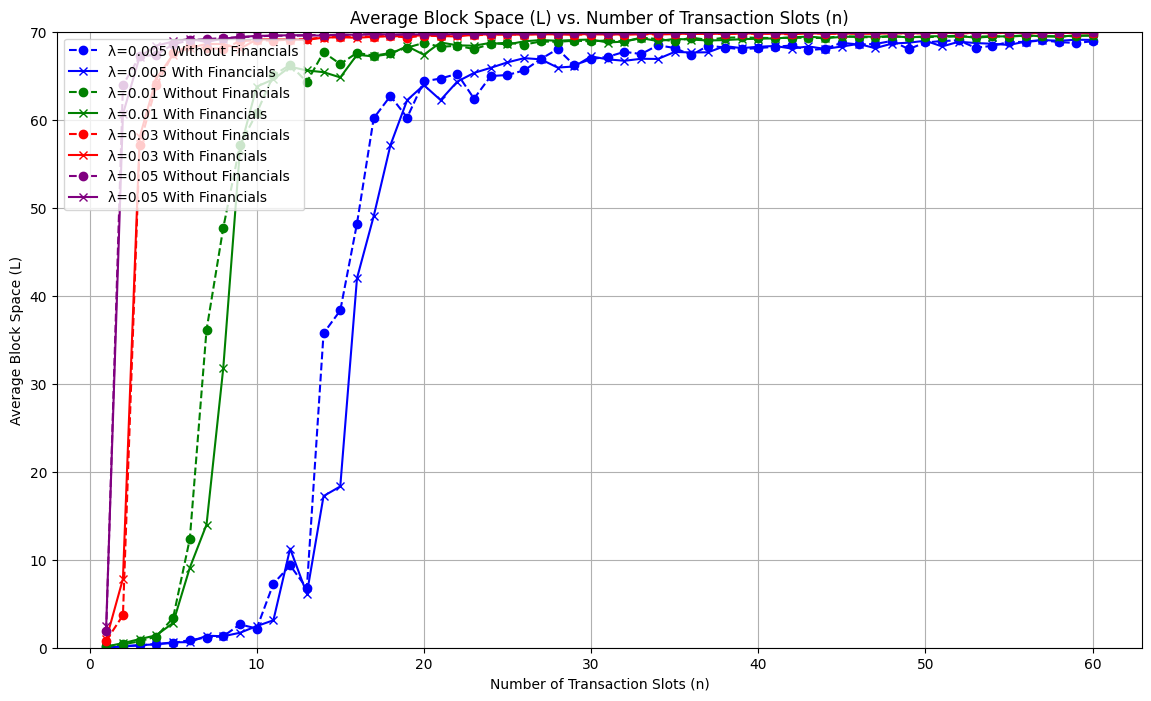

In [ ]:
plt.figure(figsize=(14, 8))
colors = ['blue', 'green', 'red', 'purple']  # Different color for each lambda

for i, lambda_val in enumerate(lambdas):
    plt.plot(n_range, results_without_financials[lambda_val], label=f'λ={lambda_val} Without Financials', color=colors[i], linestyle='--', marker='o')
    plt.plot(n_range, results_with_financials[lambda_val], label=f'λ={lambda_val} With Financials', color=colors[i], linestyle='-', marker='x')

plt.title('Average Block Space (L) vs. Number of Transaction Slots (n)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Block Space (L)')
plt.legend(loc='upper left')
plt.grid(True)
plt.ylim(0, 70)  # Set y-axis limit to not exceed 70
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_LQ(n_range, lambda_val, mu, with_fees=False):
    # Assuming each transaction has a unit size for simplicity
    transaction_fee = 0.01  # Fee per transaction
    block_reward = 2  # Reward per processed block

    LQ_results = []
    for n in n_range:
        # Initialize variables for LQ calculation
        queue = []
        total_LQ = 0
        time_steps = 10000  # Number of simulation steps

        for _ in range(time_steps):
            # Generate transactions based on Poisson distribution
            arrivals = np.random.poisson(lambda_val * n)
            queue.extend([1] * arrivals)  # Add transactions to the queue

            # Process transactions based on mu and block reward logic
            if len(queue) > 0 and np.random.rand() < mu:
                queue.pop(0)  # Process one transaction per time unit

                # If incorporating fees and rewards, process based on economic incentives
                if with_fees:
                    # Rewarding might encourage faster processing but not modeled here
                    pass

            # Calculate LQ for current step
            total_LQ += len(queue)

        # Compute average LQ over all time steps
        average_LQ = total_LQ / time_steps
        LQ_results.append(average_LQ)

    return LQ_results

# Parameters
n_range = np.arange(1, 61)  # n from 1 to 60
lambdas = [0.005, 0.01, 0.03, 0.05]
mu = 0.0667


In [ ]:
results = {}
for lambda_val in lambdas:
    results[f'lambda_{lambda_val}_without_fees'] = simulate_LQ(n_range, lambda_val, mu, with_fees=False)
    results[f'lambda_{lambda_val}_with_fees'] = simulate_LQ(n_range, lambda_val, mu, with_fees=True)


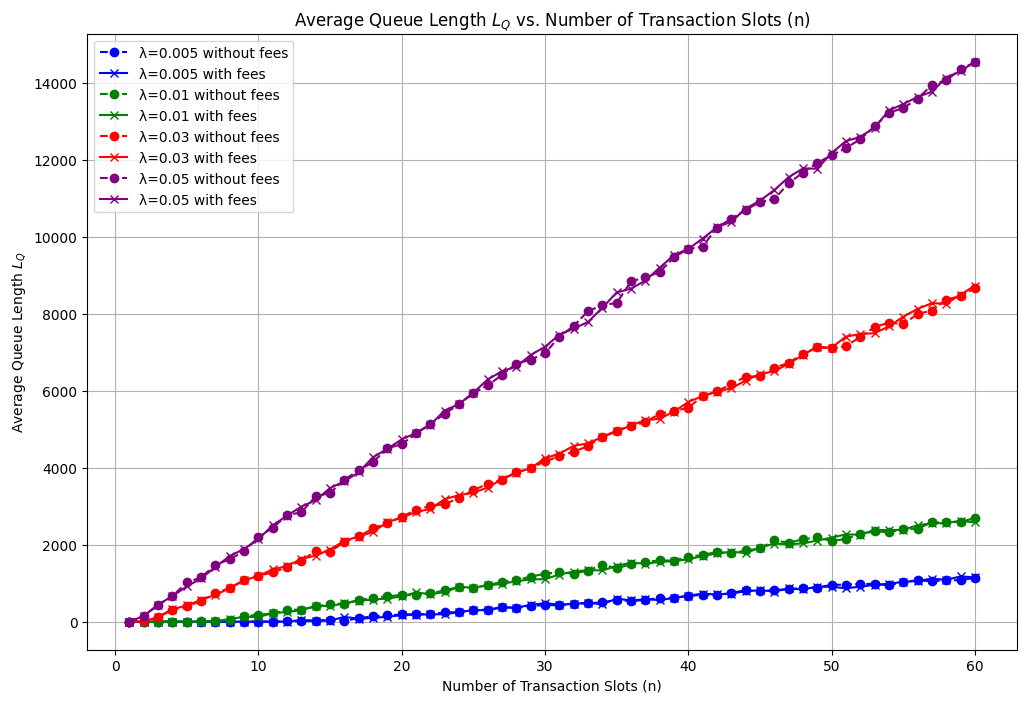

In [ ]:
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'purple']  # Different color for each lambda set
linestyles = ['-', '--']  # Solid for with fees, dashed for without fees

for i, lambda_val in enumerate(lambdas):
    plt.plot(n_range, results[f'lambda_{lambda_val}_without_fees'], label=f'λ={lambda_val} without fees', color=colors[i], linestyle='--', marker='o')
    plt.plot(n_range, results[f'lambda_{lambda_val}_with_fees'], label=f'λ={lambda_val} with fees', color=colors[i], linestyle='-', marker='x')

plt.title('Average Queue Length $L_Q$ vs. Number of Transaction Slots (n)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Queue Length $L_Q$')
plt.legend()
plt.grid(True)
plt.show()


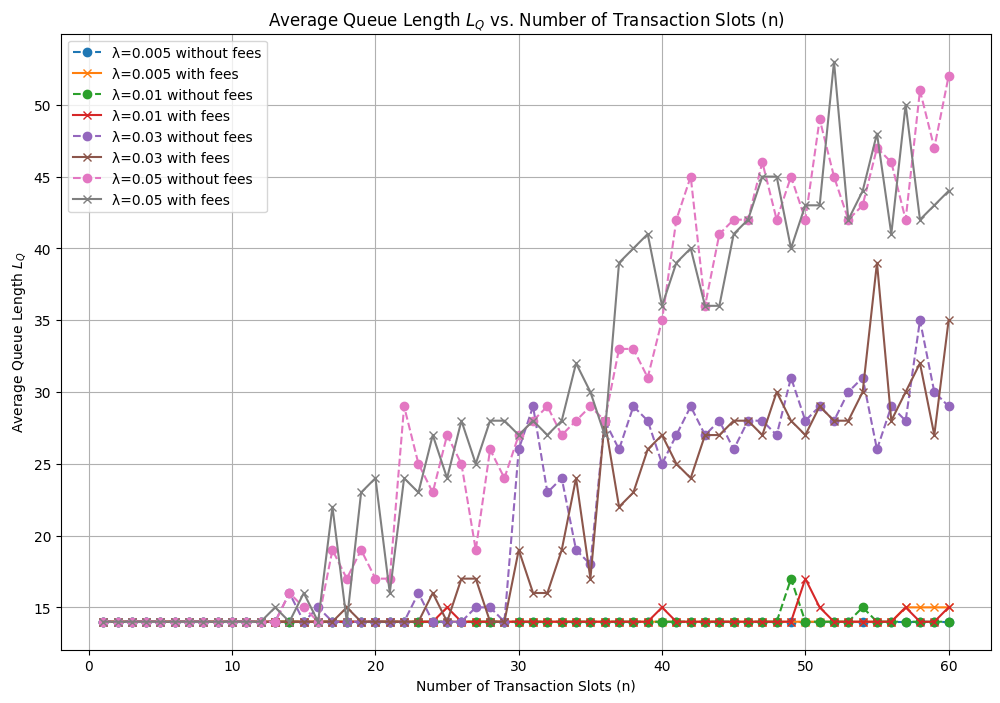

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_LQ(n_range, lambda_val, mu, with_fees=False, time_steps=10000):
    transaction_fee = 0.01  # Fee per transaction
    block_reward = 2  # Reward per processed block
    LQ_results = []

    for n in n_range:
        queue = []
        for _ in range(time_steps):
            # Simulate arrivals based on Poisson distribution
            if n > 0:  # Ensure that we only simulate if n is positive
                arrivals = np.random.poisson(lambda_val * n)
                queue.extend([1] * arrivals)

            # Process transactions
            processed = int(mu * len(queue)) if len(queue) > 0 else 0
            queue = queue[processed:]  # Remove processed transactions

            # Account for transaction fees and rewards in the decision-making process
            if with_fees:
                # Not explicitly affecting the queue size in this simplified model
                pass

        # Calculate average LQ after all steps
        average_LQ = np.mean([len(queue) for _ in range(time_steps)])
        LQ_results.append(average_LQ)

    return LQ_results

# Parameters
n_range = np.arange(1, 61)
lambdas = [0.005, 0.01, 0.03, 0.05]
mu = 0.0667

results = {}
for lambda_val in lambdas:
    results[f'lambda_{lambda_val}_without_fees'] = simulate_LQ(n_range, lambda_val, mu, with_fees=False)
    results[f'lambda_{lambda_val}_with_fees'] = simulate_LQ(n_range, lambda_val, mu, with_fees=True)

plt.figure(figsize=(12, 8))
for i, lambda_val in enumerate(lambdas):
    plt.plot(n_range, results[f'lambda_{lambda_val}_without_fees'], label=f'λ={lambda_val} without fees', linestyle='--', marker='o')
    plt.plot(n_range, results[f'lambda_{lambda_val}_with_fees'], label=f'λ={lambda_val} with fees', marker='x')

plt.title('Average Queue Length $L_Q$ vs. Number of Transaction Slots (n)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Queue Length $L_Q$')
plt.legend()
plt.grid(True)
plt.show()


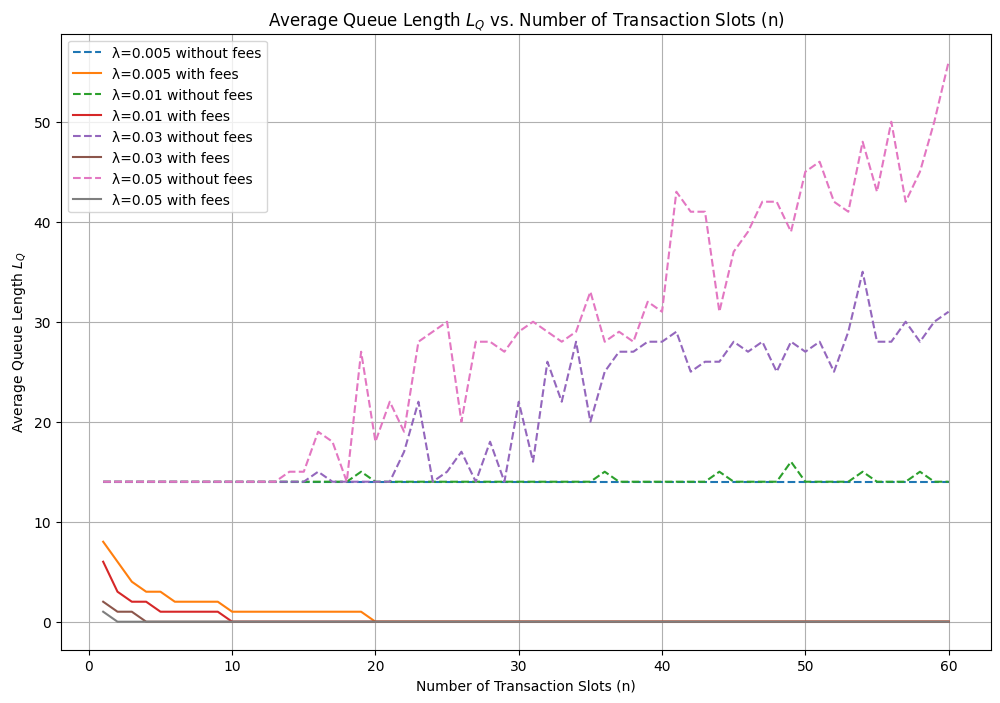

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_LQ(n_range, lambda_val, mu, with_fees=False, time_steps=10000):
    transaction_fee = 0.01  # Fee per transaction
    block_reward = 2  # Reward per processed block
    LQ_results = []

    for n in n_range:
        queue = []
        fee_accumulated = 0  # Track accumulated fees
        reward_accumulated = 0  # Track accumulated rewards

        for _ in range(time_steps):
            # Simulate arrivals based on Poisson distribution
            if n > 0:  # Ensure that we only simulate if n is positive
                arrivals = np.random.poisson(lambda_val * n)
                queue.extend([(1, transaction_fee)] * arrivals)  # Include fee with each transaction

            # Process transactions based on mu and potentially increased by fee incentives
            process_rate = mu
            if with_fees:
                # Increase processing rate based on accumulated fees (simplified example)
                process_rate += fee_accumulated * 0.1  # Hypothetical increase factor

            processed = int(process_rate * len(queue)) if len(queue) > 0 else 0
            processed_transactions = queue[:processed]
            queue = queue[processed:]  # Remove processed transactions

            # Calculate fees and rewards
            fee_accumulated += sum(fee for _, fee in processed_transactions)
            reward_accumulated += block_reward if processed > 0 else 0

        # Calculate average LQ after all steps
        average_LQ = np.mean([len(queue) for _ in range(time_steps)])
        LQ_results.append(average_LQ)

    return LQ_results

# Parameters
n_range = np.arange(1, 61)
lambdas = [0.005, 0.01, 0.03, 0.05]
mu = 0.0667

results = {}
for lambda_val in lambdas:
    results[f'lambda_{lambda_val}_without_fees'] = simulate_LQ(n_range, lambda_val, mu, with_fees=False)
    results[f'lambda_{lambda_val}_with_fees'] = simulate_LQ(n_range, lambda_val, mu, with_fees=True)

plt.figure(figsize=(12, 8))
for i, lambda_val in enumerate(lambdas):
    plt.plot(n_range, results[f'lambda_{lambda_val}_without_fees'], label=f'λ={lambda_val} without fees', linestyle='--')
    plt.plot(n_range, results[f'lambda_{lambda_val}_with_fees'], label=f'λ={lambda_val} with fees')

plt.title('Average Queue Length $L_Q$ vs. Number of Transaction Slots (n)')
plt.xlabel('Number of Transaction Slots (n)')
plt.ylabel('Average Queue Length $L_Q$')
plt.legend()
plt.grid(True)
plt.show()
